In [1]:
# Write a program to demonstrate the perceptron learning law with its decision region
# using python. Give the output in graphical form

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    #print(data)
    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

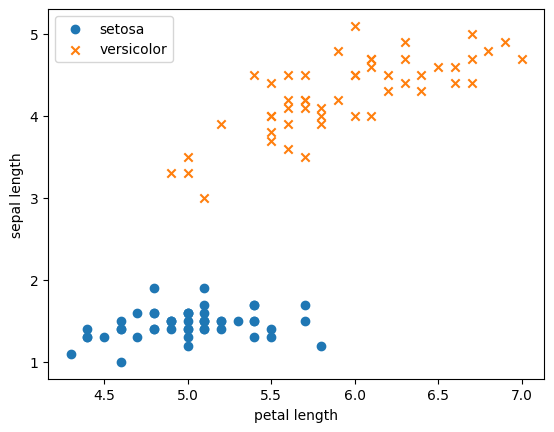

In [4]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [5]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)


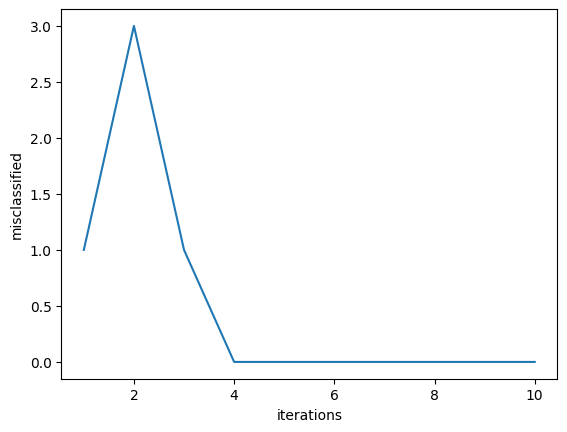

In [6]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [7]:
##2

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Generate random data points for two classes
np.random.seed(42)
class1_points = np.random.rand(20, 2) * 2 - 1
class2_points = np.random.rand(20, 2) * 2 + 1

In [10]:
# Create labels for the two classes
class1_labels = np.ones(20)
class2_labels = -np.ones(20)

In [11]:
# Combine data points and labels
X = np.vstack((class1_points, class2_points))
y = np.hstack((class1_labels, class2_labels))


In [12]:
# Initialize weights and bias
w = np.random.rand(2)
b = np.random.rand()

In [13]:
# Perceptron learning algorithm
learning_rate = 0.1
epochs = 100

In [14]:
for _ in range(epochs):
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            w += learning_rate * y[i] * X[i]
            b += learning_rate * y[i]


In [15]:
# Plot decision boundary
x_vals = np.linspace(-2, 2, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

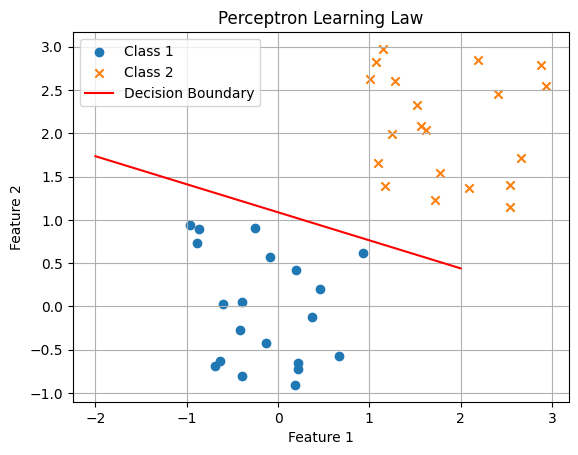

In [16]:
plt.scatter(class1_points[:, 0], class1_points[:, 1], label="Class 1", marker="o")
plt.scatter(class2_points[:, 0], class2_points[:, 1], label="Class 2", marker="x")
plt.plot(x_vals, y_vals, color="red", label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Learning Law")
plt.legend()
plt.grid(True)
plt.show()